### Code scritpie: **In hoeverre draagt het gedrag van Bitcoin whales bij aan het verbeteren van prijsvoorspellingen?**

BTC prijs historie dataset inladen
Bron ( )

In [1]:
# import sys
# !{sys.executable} -m pip install kagglehub



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Installeren en Importen 

In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
# import kagglehub

# #Download latest version
# path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

# print("Path to dataset files:", path)

c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 113M/113M [00:10<00:00, 11.2MB/s] 

Extracting files...


Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\207


# Data verkenning

In [4]:
import pandas as pd

# Vervang 'bestandsnaam.csv' met de juiste naam van het bestand in je dataset
csv_file = os.path.join(path, "btcusd_1-min_data.csv")  # Zoek eerst de juiste bestandsnaam
df_holc = pd.read_csv(csv_file)

# Bekijk de eerste paar rijen van de dataset
df_holc.head()


C:\Users\boris\AppData\Local\Temp\ipykernel_32460\3476701982.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_holc = pd.read_csv(csv_file)


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [5]:
df_holc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988044 entries, 0 to 6988043
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
 6   datetime   object 
dtypes: float64(6), object(1)
memory usage: 373.2+ MB


In [6]:
# Bekijk de unieke waarden in de Volume-kolom
unique_values = df_holc["Volume"].unique()

print("Unieke waarden in de Volume-kolom:", unique_values)

Unieke waarden in de Volume-kolom: [ 0.         10.         10.1        ...  0.01348336  0.52635055
  0.08205254]


In [7]:
# Eerste timestamp
eerste_timestamp = df_holc["Timestamp"].min()

# Laatste timestamp
laatste_timestamp = df_holc["Timestamp"].max()

print("Eerste timestamp:", eerste_timestamp)
print("Laatste timestamp:", laatste_timestamp)


Eerste timestamp: 1325412060.0
Laatste timestamp: 1744764240.0


In [8]:
import pandas as pd

# Timestamps omzetten naar een leesbaar formaat
eerste_datum = pd.to_datetime(1325412060, unit="s")
laatste_datum = pd.to_datetime(1740614400, unit="s")

print("Eerste datum:", eerste_datum)
print("Laatste datum:", laatste_datum)


Eerste datum: 2012-01-01 10:01:00
Laatste datum: 2025-02-27 00:00:00


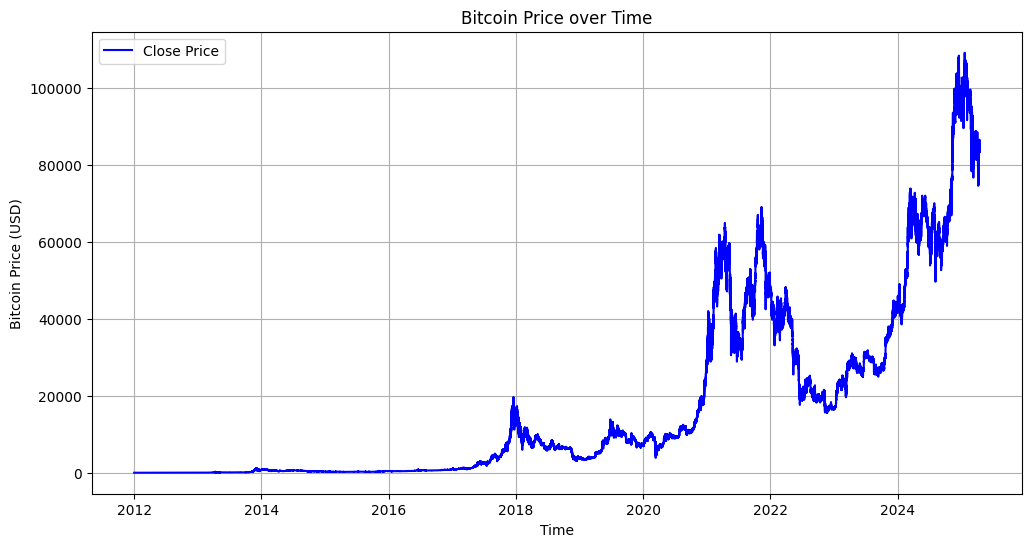

In [9]:
import matplotlib.pyplot as plt

# Zorg ervoor dat je Timestamp omgezet is naar een leesbare datum
df_holc["Timestamp"] = pd.to_datetime(df_holc["Timestamp"], unit="s")

# Plot de Closing Price over tijd
plt.figure(figsize=(12,6))
plt.plot(df_holc["Timestamp"], df_holc["Close"], label="Close Price", color="blue")

# Grafiek instellingen
plt.xlabel("Time")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price over Time")
plt.legend()
plt.grid(True)

# Weergeven
plt.show()


In [10]:
df_holc.shape

(6988044, 7)

In [11]:
df_holc.head()

,Timestamp,Open,High,Low,Close,Volume,datetime
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


# Inladen Memepool data

               x  mempool_tx_count                date
0  1466001900000      17325.729167 2016-06-15 14:45:00
1  1466185500000      10574.645833 2016-06-17 17:45:00
2  1466369100000       2768.901042 2016-06-19 20:45:00
3  1466552700000       4250.802083 2016-06-21 23:45:00
4  1466736300000       5839.572917 2016-06-24 02:45:00


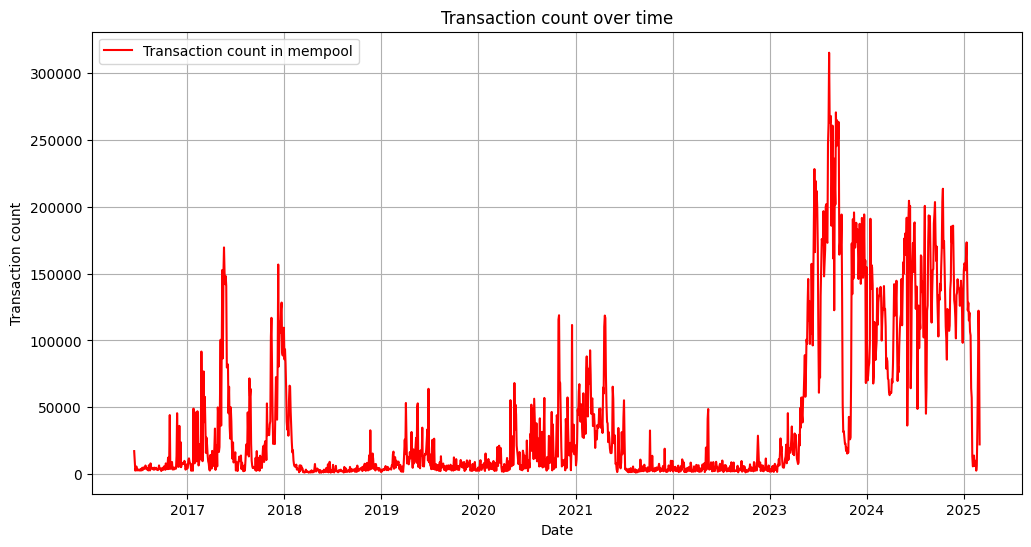

✅ Data succesvol opgeslagen in 'mempool_data.csv'


In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Stap 1: JSON-bestand inlezen (vervang met je echte pad)
json_file = r"C:\Users\boris\Downloads\mempool-count.json"

try:
    with open(json_file, "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print(f"❌ Bestand '{json_file}' niet gevonden. Controleer of het correct is opgeslagen.")
    exit()
except json.JSONDecodeError:
    print(f"❌ JSON-bestand '{json_file}' is niet correct geformatteerd.")
    exit()

# 📌 Stap 2: Controleer of "mempool-count" in de JSON-structuur zit
if "mempool-count" not in data:
    print("❌ De JSON bevat geen sleutel 'mempool-count'. Controleer de structuur van het bestand.")
    exit()

# 📌 Stap 3: Data omzetten naar een Pandas DataFrame
df_mempool = pd.DataFrame(data["mempool-count"])  # Gebruik de juiste sleutel

# 📌 Stap 4: UNIX tijdstempels (milliseconden) omzetten naar een leesbare datum
df_mempool["date"] = pd.to_datetime(df_mempool["x"], unit="ms")  # "x" bevat de UNIX-tijdstempel
df_mempool = df_mempool.rename(columns={"y": "mempool_tx_count"})  # "y" bevat het aantal transacties in de mempool

# 📌 Stap 5: Data weergeven en controleren
print(df_mempool.head())  # Laat de eerste paar rijen zien

# 📌 Stap 6: Data visualiseren in een grafiek
plt.figure(figsize=(12, 6))
plt.plot(df_mempool["date"], df_mempool["mempool_tx_count"], label="Transaction count in mempool", color="red")
plt.xlabel("Date")
plt.ylabel("Transaction count")
plt.title("Transaction count over time")
plt.legend()
plt.grid()
plt.show()

# 📌 Stap 7: Data exporteren naar een CSV-bestand als je het later wilt bekijken
df_mempool.to_csv("mempool_data.csv", index=False)
print("✅ Data succesvol opgeslagen in 'mempool_data.csv'")


# Fear & Greed index data inladen

In [13]:
import requests
import pandas as pd
from datetime import datetime
import time

def load_fear_greed_data(limit=0):
    """
    Load Fear & Greed Index data from the API
    Args:
        limit (int): Number of results to return. Use 0 for all available data
    Returns:
        DataFrame with Fear & Greed Index data
    """
    # API endpoint
    url = f"https://api.alternative.me/fng/?limit={limit}"
    
    try:
        # Make API request
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        # Parse JSON response
        data = response.json()
        
        # Extract the data points
        data_points = data['data']
        
        # Convert to DataFrame
        df_fear_greed = pd.DataFrame(data_points)
        
        # Convert timestamp to datetime
        df_fear_greed['date'] = pd.to_datetime(df_fear_greed['timestamp'].astype(int), unit='s')
        
        # Convert value to numeric
        df_fear_greed['value'] = df_fear_greed['value'].astype(int)
        
        # Reorder columns
        df_fear_greed = df_fear_greed[['date', 'value', 'value_classification']]
        
        # Sort by date
        df_fear_greed = df_fear_greed.sort_values('date')
        
        return df_fear_greed
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

if __name__ == "__main__":
    # Load all available data
    df_fear_greed = load_fear_greed_data(limit=0)
    
    if df_fear_greed is not None:
        # Save to CSV
        df_fear_greed.to_csv('fear_greed_data.csv', index=False)
        print("Data successfully saved to fear_greed_data.csv")
        print("\nFirst few rows of the data:")
        print(df_fear_greed.head())

Data successfully saved to fear_greed_data.csv

First few rows of the data:
           date  value value_classification
2627 2018-02-01     30                 Fear
2626 2018-02-02     15         Extreme Fear
2625 2018-02-03     40                 Fear
2624 2018-02-04     24         Extreme Fear
2623 2018-02-05     11         Extreme Fear


In [14]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


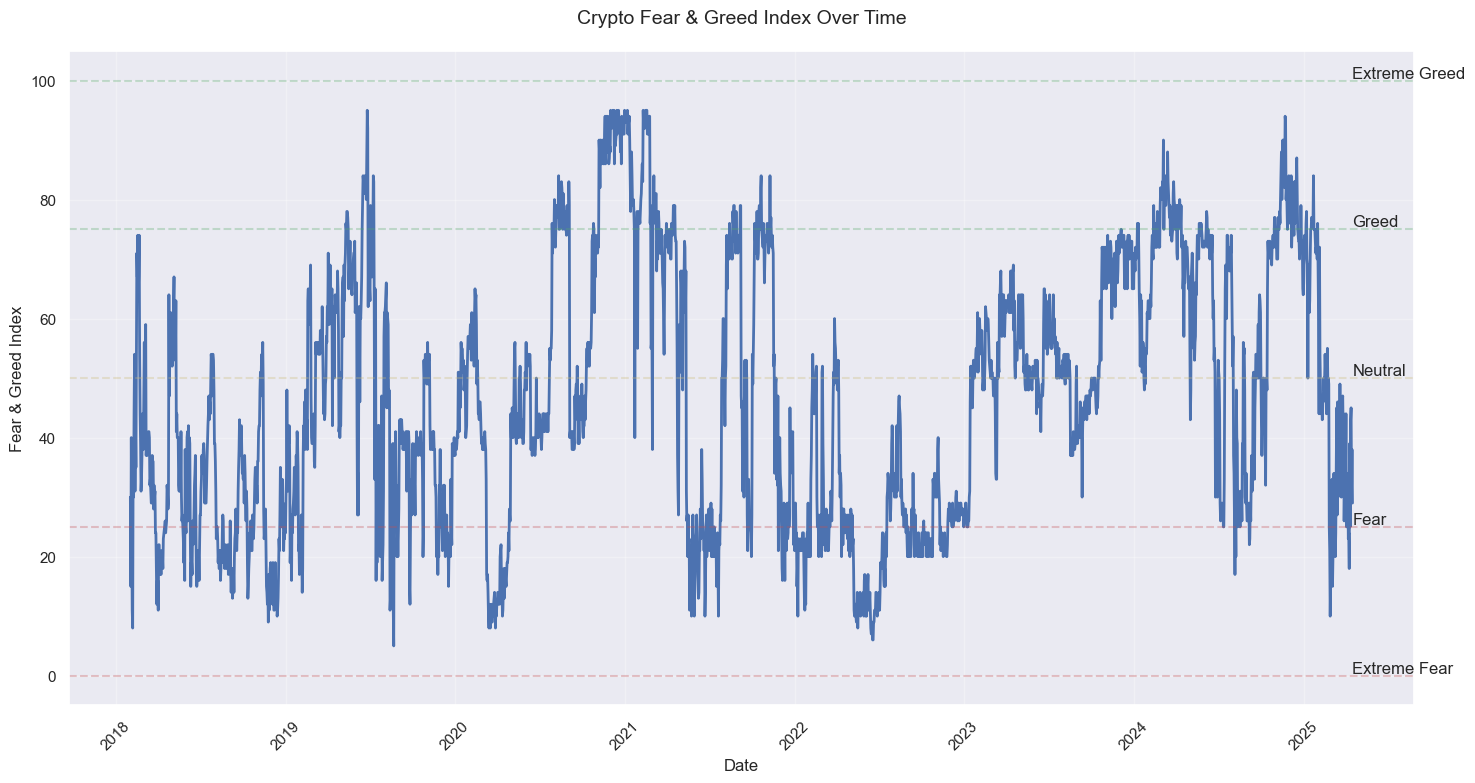

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stel de stijl in
plt.style.use('default')  # Gebruik de standaard matplotlib stijl
sns.set_theme()  # Gebruik seaborn's standaard thema

# Maak de grafiek
plt.figure(figsize=(15, 8))
plt.plot(df_fear_greed['date'], df_fear_greed['value'], linewidth=2)

# Voeg horizontale lijnen toe voor de sentiment niveaus
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=25, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=50, color='y', linestyle='--', alpha=0.3)
plt.axhline(y=75, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=100, color='g', linestyle='--', alpha=0.3)

# Voeg labels toe
plt.title('Crypto Fear & Greed Index Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fear & Greed Index', fontsize=12)

# Voeg sentiment labels toe
plt.text(df_fear_greed['date'].max(), 0, 'Extreme Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 25, 'Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 50, 'Neutral', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 75, 'Greed', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 100, 'Extreme Greed', verticalalignment='bottom')

# Rotate x-axis labels voor betere leesbaarheid
plt.xticks(rotation=45)

# Voeg grid toe
plt.grid(True, alpha=0.3)

# Pas de layout aan
plt.tight_layout()

# Toon de grafiek
plt.show()

# DF Fear & Greed cleanen en prepereren 

Fear&Greed index omzetten naar per dag (24 uur)

In [16]:
# Print de eerste paar rijen van de datetime kolom
print("First few timestamps in df_fear_greed:")
print(df_fear_greed['date'].head())

# Print informatie over de datetime kolom
print("\nDatetime info:")
print(df_fear_greed['date'].dtype)

# Print unieke timestamps per dag om te zien hoe vaak per dag wordt gemeten
print("\nUnique timestamps per day:")
print(df_fear_greed['date'].dt.date.value_counts().sort_index().head())


First few timestamps in df_fear_greed:
2627   2018-02-01
2626   2018-02-02
2625   2018-02-03
2624   2018-02-04
2623   2018-02-05
Name: date, dtype: datetime64[ns]

Datetime info:
datetime64[ns]

Unique timestamps per day:
date
2018-02-01    1
2018-02-02    1
2018-02-03    1
2018-02-04    1
2018-02-05    1
Name: count, dtype: int64


In [17]:
# Vind de vroegste datum in de dataset
earliest_date = df_fear_greed['date'].min()
print(f"De vroegste datum in de Fear & Greed dataset is: {earliest_date}")


De vroegste datum in de Fear & Greed dataset is: 2018-02-01 00:00:00


In [18]:
# Check voor ontbrekende waarden
print("Aantal ontbrekende waarden per kolom:")
print(df_fear_greed.isnull().sum())

# Check voor nul waarden
print("\nAantal nul waarden per kolom:")
print((df_fear_greed == 0).sum())

# Verwijder rijen met ontbrekende waarden als die er zijn
if df_fear_greed.isnull().sum().sum() > 0:
    df_fear_greed = df_fear_greed.dropna()
    print("\nOntbrekende waarden zijn verwijderd")
    print("Nieuwe shape:", df_fear_greed.shape)

# Check of er nog steeds nul waarden zijn in de 'value' kolom
zero_values = df_fear_greed[df_fear_greed['value'] == 0]
if not zero_values.empty:
    print("\nAantal rijen met value = 0:", len(zero_values))
    print("Deze rijen zijn:")
    print(zero_values)
    
    # Optioneel: verwijder rijen waar value = 0
    df_fear_greed = df_fear_greed[df_fear_greed['value'] != 0]
    print("\nRijen met value = 0 zijn verwijderd")
    print("Finale shape:", df_fear_greed.shape)


Aantal ontbrekende waarden per kolom:
date                    0
value                   0
value_classification    0
dtype: int64

Aantal nul waarden per kolom:
date                    0
value                   0
value_classification    0
dtype: int64


# DF mempool data cleanen en prepereren:

In [19]:
# Controleer de mempool data op null waarden, NaN values en missende waarden
print("Aantal ontbrekende waarden (NaN) per kolom in mempool data:")
print(df_mempool.isnull().sum())

print("\nAantal null waarden per kolom:")
print((df_mempool.isnull() | df_mempool.isna()).sum())

# Verwijder rijen met ontbrekende waarden als die er zijn
if df_mempool.isnull().sum().sum() > 0:
    df_mempool = df_mempool.dropna()
    print("\nOntbrekende waarden zijn verwijderd")
    print("Nieuwe shape:", df_mempool.shape)

# Check voor duplicaten
duplicates = df_mempool.duplicated()
if duplicates.any():
    print(f"\nAantal duplicaten gevonden: {duplicates.sum()}")
    df_mempool = df_mempool.drop_duplicates()
    print("Duplicaten zijn verwijderd")
    print("Finale shape:", df_mempool.shape)


Aantal ontbrekende waarden (NaN) per kolom in mempool data:
x                   0
mempool_tx_count    0
date                0
dtype: int64

Aantal null waarden per kolom:
x                   0
mempool_tx_count    0
date                0
dtype: int64


In [23]:
df_mempool

,x,mempool_tx_count,date
0,1466001900000,17325.729167,2016-06-15 14:45:00
1,1466185500000,10574.645833,2016-06-17 17:45:00
2,1466369100000,2768.901042,2016-06-19 20:45:00
3,1466552700000,4250.802083,2016-06-21 23:45:00
4,1466736300000,5839.572917,2016-06-24 02:45:00
...,...,...,...
1492,1740041100000,33921.161458,2025-02-20 08:45:00
1493,1740224700000,73987.645833,2025-02-22 11:45:00
1494,1740408300000,122246.453125,2025-02-24 14:45:00
1495,1740591900000,98404.625000,2025-02-26 17:45:00


In [25]:
import pandas as pd

# Zorg dat de kolom 'date' als datetime wordt gelezen
df_mempool['date'] = pd.to_datetime(df_mempool['date'])

# Bereken het tijdsverschil tussen opeenvolgende rijen
df_mempool['time_diff'] = df_mempool['date'].diff()

# Bekijk de meest voorkomende tijdsverschillen
frequentie = df_mempool['time_diff'].value_counts().head()

print("Top meest voorkomende tijdsintervallen:")
print(frequentie)

# Als je de gemiddelde tijd tussen metingen wilt weten:
gemiddeld_interval = df_mempool['time_diff'].mean()
print(f"\nGemiddeld tijdsinterval tussen metingen: {gemiddeld_interval}")


Top meest voorkomende tijdsintervallen:
time_diff
2 days 03:00:00    1467
2 days 03:15:00      10
2 days 03:30:00       7
2 days 03:45:00       5
2 days 05:00:00       2
Name: count, dtype: int64

Gemiddeld tijdsinterval tussen metingen: 2 days 03:01:12.192513368


Timestaps omzetten naar per dag:

In [33]:
# Zorg dat de datumkolom een datetime-object is
df_mempool['date'] = pd.to_datetime(df_mempool['x'], unit='ms')

# Stel de datum in als index
df_mempool.set_index('date', inplace=True)

# Resample de data per dag (1 dag = 'D'), en bereken aggregaties:
df_mempool_daily = df_mempool['mempool_tx_count'].resample('1D').agg(['mean', 'median', 'std', 'max'])

# Optioneel: verwijder rijen met alleen NaNs (dagen zonder data)
df_mempool_daily = df_mempool_daily.dropna(how='all')

# Bekijk resultaat
print(df_mempool_daily.head())

                    mean        median  std           max
date                                                     
2016-06-15  17325.729167  17325.729167  NaN  17325.729167
2016-06-17  10574.645833  10574.645833  NaN  10574.645833
2016-06-19   2768.901042   2768.901042  NaN   2768.901042
2016-06-21   4250.802083   4250.802083  NaN   4250.802083
2016-06-24   5839.572917   5839.572917  NaN   5839.572917


In [34]:
# Calculate the maximum standard deviation value
max_std = df_mempool_daily['std'].max()
print(f"\nHighest standard deviation value in mempool transaction counts: {max_std:.2f}")



Highest standard deviation value in mempool transaction counts: nan


Er zijn nooit 2 waarnemingen op 1 dag dus ik pag de mean als waarde voor mempool per 2 dagen. 

In [35]:
# Reset index to make date a column again
df_mempool_daily = df_mempool_daily.reset_index()

# Select only 'date' and 'mean' columns and rename 'mean' to 'transaction_count'
df_mempool_daily = df_mempool_daily[['date', 'mean']].rename(columns={'mean': 'transaction_count'})

# Display first few rows to verify the changes
print(df_mempool_daily.head())


        date  transaction_count
0 2016-06-15       17325.729167
1 2016-06-17       10574.645833
2 2016-06-19        2768.901042
3 2016-06-21        4250.802083
4 2016-06-24        5839.572917


De mempooldata wordt geherindexeerd naar dagelijkse frequentie met behulp van forward fill. Dit betekent dat de laatst bekende waarde wordt doorgetrokken naar dagen zonder metingen. Forward fill is gekozen boven interpolatie omdat netwerkcongestie meestal abrupt verandert en niet vloeiend verloopt. Interpolatie zou onnatuurlijke tussengelegen waarden genereren die niet zijn waargenomen, wat de betrouwbaarheid en interpretatie van het model zou kunnen verminderen. Forward fill sluit beter aan bij de realiteit van het Bitcoin-netwerk en zorgt voor een stabielere invoer voor het model.

In [36]:
# Set date as index for resampling
df_mempool_daily.set_index('date', inplace=True)

# Resample to daily frequency and forward fill missing values
df_mempool_daily = df_mempool_daily.resample('D').ffill()

# Reset index to make date a column again
df_mempool_daily = df_mempool_daily.reset_index()

# Display first few rows to verify the changes
print("Data after forward filling:")
print(df_mempool_daily.head())


Data after forward filling:
        date  transaction_count
0 2016-06-15       17325.729167
1 2016-06-16       17325.729167
2 2016-06-17       10574.645833
3 2016-06-18       10574.645833
4 2016-06-19        2768.901042


In [38]:
# Filter mempool data to keep only records from 2018-02-01 onwards
df_mempool_daily = df_mempool_daily[df_mempool_daily['date'] >= '2018-02-01']

# Reset index after filtering
df_mempool_daily.reset_index(drop=True, inplace=True)

print("Data after filtering to 2018-02-01 onwards:")
print(df_mempool_daily.head())


Data after filtering to 2018-02-01 onwards:
        date  transaction_count
0 2018-02-01       16347.015625
1 2018-02-02       18025.244792
2 2018-02-03       18025.244792
3 2018-02-04       10364.484375
4 2018-02-05       10364.484375


# DF HOLC cleanen en prepareren 

In [37]:
df_holc

,Timestamp,Open,High,Low,Close,Volume,datetime
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
6988039,2025-04-16 00:40:00,83493.00,83493.00,83448.00,83449.00,0.063748,NaN
6988040,2025-04-16 00:41:00,83448.00,83448.00,83336.00,83336.00,0.013483,NaN
6988041,2025-04-16 00:42:00,83332.00,83366.00,83332.00,83366.00,0.526351,NaN
6988042,2025-04-16 00:43:00,83366.00,83381.00,83337.00,83381.00,0.082053,NaN


In [39]:
# Filter HOLC data to keep only records from 2018-02-01 onwards
df_holc = df_holc[df_holc['datetime'] >= '2018-02-01']

# Reset index after filtering
df_holc.reset_index(drop=True, inplace=True)

print("HOLC data after filtering to 2018-02-01 onwards:")
print(df_holc.head())


HOLC data after filtering to 2018-02-01 onwards:
            Timestamp     Open     High      Low    Close     Volume  \
0 2018-02-01 00:00:00  9974.91  9974.91  9947.20  9947.20   2.951064   
1 2018-02-01 00:01:00  9947.09  9948.71  9922.83  9922.86   5.343178   
2 2018-02-01 00:02:00  9948.19  9963.60  9929.10  9963.60   0.990287   
3 2018-02-01 00:03:00  9947.44  9968.13  9925.72  9967.59  70.055735   
4 2018-02-01 00:04:00  9967.57  9967.77  9940.04  9941.46   2.849184   

                    datetime  
0  2018-02-01 00:00:00+00:00  
1  2018-02-01 00:01:00+00:00  
2  2018-02-01 00:02:00+00:00  
3  2018-02-01 00:03:00+00:00  
4  2018-02-01 00:04:00+00:00  


In [41]:
# Check for null values in HOLC data
print("\nNull values in HOLC data:")
print(df_holc.isnull().sum())

# Check for zero values in HOLC data
print("\nZero values in HOLC data:")
print((df_holc == 0).sum())

# Display basic statistics for HOLC data
print("\nHOLC data statistics:")
print(df_holc.describe())



Null values in HOLC data:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
datetime     0
dtype: int64

Zero values in HOLC data:
Timestamp        0
Open             0
High             0
Low              0
Close            0
Volume       93700
datetime         0
dtype: int64

HOLC data statistics:
                           Timestamp          Open          High  \
count                        3582121  3.582121e+06  3.582121e+06   
mean   2021-06-30 14:24:24.764255232  2.762354e+04  2.763484e+04   
min              2018-02-01 00:00:00  3.124450e+03  3.131860e+03   
25%              2019-10-15 22:30:00  8.835690e+03  8.841280e+03   
50%              2021-06-28 22:00:00  2.176700e+04  2.177482e+04   
75%              2023-03-12 21:30:00  4.234000e+04  4.235300e+04   
max              2025-03-15 00:00:00  1.089460e+05  1.090300e+05   
std                              NaN  2.180655e+04  2.181431e+04   

                Low         Close        Volum

In [42]:
# Zorg dat de datetime kolom goed staat
df_holc['datetime'] = pd.to_datetime(df_holc['datetime'])
df_holc.set_index('datetime', inplace=True)

# Resample per dag met standaard OHLCV-logica
df_daily = df_holc.resample('1D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Reset index als je liever een kolom 'date' hebt in plaats van index
df_daily.reset_index(inplace=True)


C:\Users\boris\AppData\Local\Temp\ipykernel_32460\608084133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holc['datetime'] = pd.to_datetime(df_holc['datetime'])
